## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusions](#conclusions)

## Introduction <a name="introduction"></a>
The city of Seattle collects data on motor vehicle collisions, and the data sets are available for the last several years. It is the objective of this project to analyze the data and use the insights gained from the data to predict the patterns in conditions that lead to accidents, and the severity of the accidents. 

These insights can be made available to the city and the public, and can be used to enhance public safety and minimize accidents and their severity. For example, if accidents are found to occur at a higher rate under some weather or road conditions, the members of the public may try to avoid driving under those weather conditions whenever possible, or may exercise increased caution. City officials may also take measures to improve public safety. For example, if many accidents occur due to distracted driving, the city officials may try to educate the public to be more mindful of the risks, or require defensive driving training. 

In this Python notebook, the data set provided will be analyzed, and recommendations will be made based on the conclusions from the data analysis and machine learning techniques applied to the data.

## Data <a name="data"></a>

Based on the problem description, the data set will now be downloaded and analyzed. The severity and occurrence of accidents will be counted and plotted as a function of different variables, and the important variables will be identified. The data set will be cleaned, missing values dropped when necessary, and the important features will be collected for predictive modeling.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data-Collisions.csv to Data-Collisions.csv


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, classification_report, log_loss, recall_score
import warnings

In [ ]:
# Suppress unnecessary warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [ ]:
# Read dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['Data-Collisions.csv']))


Understanding dataframe column descriptions and values

In [ ]:
# Shape of dataframe
df.shape

(194673, 38)

In [ ]:
# description of the dataframe
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [ ]:
# Column names
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Now we will start looking in detail at all the columns and determine their value counts

In [ ]:
# SEVERITYCODE
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [ ]:
# SEVERITYCODE, normalized value counts
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

In [ ]:
# Look at ROADCOND column, determine the value counts
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [ ]:
# ADDRTYPE
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [ ]:
# LOCATION
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N     276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB     271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N           265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                     254
6TH AVE AND JAMES ST                                               252
                                                                  ... 
S JACKSON ST BETWEEN SHORT PL S AND 30TH AVE S                       1
27TH AVE NW AND NW 85TH ST                                           1
19TH AVE S BETWEEN S HOLGATE ST AND S PLUM ST                        1
PHINNEY AVE N BETWEEN N 68TH ST AND N 70TH ST                        1
16TH WR AVE SW BETWEEN KLICKITAT AVE SW AND KLICKITAT WR AVE SW      1
Name: LOCATION, Length: 24102, dtype: int64

In [ ]:
# STATUS
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [ ]:
# SEVERITYCODE.1: repeat of SEVERITYCODE
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

In [ ]:
# SEVERITYDESC: description of SEVERITYCODE
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [ ]:
# COLLISIONTYPE
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [ ]:
# PERSONCOUNT: number of people involved in the collision. 
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

Since most accidents involve 4 or fewer people, accidents with 5 or more people will be combined.

In [ ]:
df['PERSONCOUNT'] = df['PERSONCOUNT'].apply(lambda x: x if x<5 else 5)
df['PERSONCOUNT'].value_counts()

2    114231
3     35553
4     14660
1     13154
5     11531
0      5544
Name: PERSONCOUNT, dtype: int64

0 person accidents are not meaningful, so they will be dropped.

In [ ]:
df.drop(df[df['PERSONCOUNT']==0].index, inplace=True)

In [ ]:
df['PERSONCOUNT'].value_counts()

2    114231
3     35553
4     14660
1     13154
5     11531
Name: PERSONCOUNT, dtype: int64

([<matplotlib.axis.XTick at 0x7ffa788142b0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5+')])

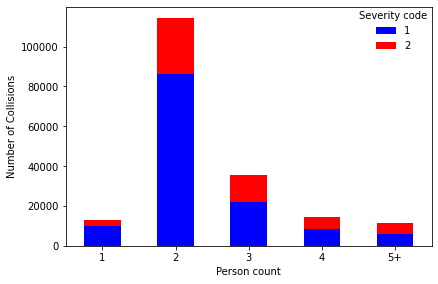

In [ ]:
# Plot person count by severity code
# Most accidents involve 2 people

df.groupby(['PERSONCOUNT', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code", borderaxespad=0, frameon=False)
plt.tight_layout()
plt.xlabel('Person count')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(0,5), labels=[1,2,3,4,'5+'], rotation=0)

In [ ]:
# PEDCOUNT: number of pedestrians
df['PEDCOUNT'].value_counts()

0    182406
1      6480
2       215
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [ ]:
# Combine PEDCOUNT values of 1 and higher

df['PEDCOUNT'] = df['PEDCOUNT'].apply(lambda x: x if x<1 else 1)

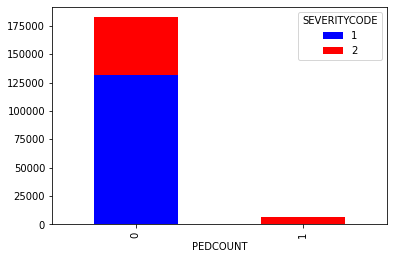

In [ ]:
# Plot PEDCOUNT

df.groupby(['PEDCOUNT','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])

In [ ]:
# PEDCYLCOUNT: number of pedestrians and bikers
df['PEDCYLCOUNT'].value_counts()

0    183832
1      5256
2        41
Name: PEDCYLCOUNT, dtype: int64

In [ ]:
# Combine PEDCYLCOUNT values of 1 or higher

df['PEDCYLCOUNT']= df['PEDCYLCOUNT'].apply(lambda x: x if x<1 else 1)

We will use PEDCYLCOUNT in the models, since PEDCOUNT contains the same information

In [ ]:
# VEHCOUNT: number of vehicles
df['VEHCOUNT'].value_counts()

2     143383
1      24977
3      12620
0       5077
4       2346
5        510
6        141
7         44
8         15
9          8
11         5
10         2
12         1
Name: VEHCOUNT, dtype: int64

Vehicle count of 0 is not meaningful when we are studying vehicle accidents. These 0 values will be dropped.

In [ ]:
df.drop(df[df['VEHCOUNT']==0].index, inplace=True)

In [ ]:
# Combine vehicle counts of 4 or higher

df['VEHCOUNT'] = df['VEHCOUNT'].apply(lambda x: x if x<4 else 4)

([<matplotlib.axis.XTick at 0x7ffa78532828>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4+')])

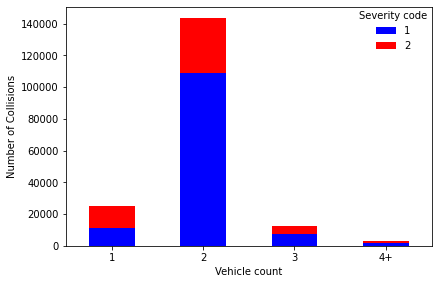

In [ ]:
# Plot vehicle count
# Most accidents involve two vehicles

df.groupby(['VEHCOUNT', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code", borderaxespad=0, frameon=False)
plt.tight_layout()
plt.xlabel('Vehicle count')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(0,4), labels=[1,2,3,'4+'], rotation=0)

In [ ]:
# JUNCTIONTYPE: type of junction, contains similar information to ADDRTYPE. ADDRTYPE will be used instead in the classification methods.
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              84245
At Intersection (intersection related)               59375
Mid-Block (but intersection related)                 22010
Driveway Junction                                    10286
At Intersection (but not related to intersection)     1956
Ramp Junction                                          159
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64

In [ ]:
# Description of collision. COLLISIONTYPE contains similar information and captures the key values, and will be used instead in the classification methods.
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          80716
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    51034
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9675
NOT ENOUGH INFORMATION / NOT APPLICABLE                          8731
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8588
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6210
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5700
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4481
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            2913
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1550
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1416
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1240
MOTOR VEHICLE OVERTURNED IN ROAD                                  453
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       176
PEDALCYCLIST STRUCK 

In [ ]:
# Whether the driver was inattentive
df['INATTENTIONIND'].value_counts()

Y    29751
Name: INATTENTIONIND, dtype: int64

In [ ]:
# Whether DUI
df['UNDERINFL'].value_counts()

N    94838
0    80099
Y     5121
1     3994
Name: UNDERINFL, dtype: int64

In [ ]:
# Weather conditions
df['WEATHER'].value_counts()

Clear                       107113
Raining                      32320
Overcast                     27054
Unknown                      14918
Snowing                        896
Other                          816
Fog/Smog/Smoke                 547
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [ ]:
# Road conditions
df['ROADCOND'].value_counts()

Dry               120087
Wet                46375
Unknown            14903
Ice                 1192
Snow/Slush           993
Other                128
Standing Water       112
Sand/Mud/Dirt         74
Oil                   63
Name: ROADCOND, dtype: int64

In [ ]:
# Light conditions
df['LIGHTCOND'].value_counts()

Daylight                    112060
Dark - Street Lights On      47340
Unknown                      13316
Dusk                          5740
Dawn                          2418
Dark - No Street Lights       1484
Dark - Street Lights Off      1176
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [ ]:
# Whether pedestrian right of way was not granted
df['PEDROWNOTGRNT'].value_counts()

Y    4627
Name: PEDROWNOTGRNT, dtype: int64

In [ ]:
# Whether speeding
df['SPEEDING'].value_counts()

Y    9308
Name: SPEEDING, dtype: int64

In [ ]:
# Collision description. COLLISIONTYPE contains similar information and captures the key values, and will be used instead in the classification methods.
df['ST_COLDESC'].value_counts()

One parked--one moving                                                 43419
Entering at angle                                                      33457
From same direction - both going straight - one stopped - rear-end     25017
Fixed object                                                           13173
From same direction - both going straight - both moving - sideswipe    12363
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Strikes Deer                                                       1
Vehicle Hits State Road or Construction Machinery                          1
Name: ST_COLDESC, Length: 61, dtype: int64

In [ ]:
# Collision code
df['ST_COLCODE'].value_counts()

32    26633
10    22218
32    16786
14    16139
10    11239
      ...  
60        1
54        1
85        1
43        1
87        1
Name: ST_COLCODE, Length: 114, dtype: int64

In [ ]:
# Lane 
df['SEGLANEKEY'].value_counts()

0        181547
6532         19
6078         16
12162        15
10336        13
          ...  
37186         1
6483          1
33344         1
23771         1
12472         1
Name: SEGLANEKEY, Length: 1810, dtype: int64

In [ ]:
# Crosswalk
df['CROSSWALKKEY'].value_counts()

0         180509
523609        16
520838        14
525567        12
521707        10
           ...  
24885          1
520993         1
524511         1
522950         1
525046         1
Name: CROSSWALKKEY, Length: 2083, dtype: int64

In [ ]:
# Hit parked car or not
df['HITPARKEDCAR'].value_counts()

N    177635
Y      6417
Name: HITPARKEDCAR, dtype: int64

In [ ]:
# Incident date, from which month, day of the week and season will be extracted
df.INCDATE[0:5]

0    2013/03/27 00:00:00+00
1    2006/12/20 00:00:00+00
2    2004/11/18 00:00:00+00
3    2013/03/29 00:00:00+00
4    2004/01/28 00:00:00+00
Name: INCDATE, dtype: object

In [ ]:
# Extracting month, year and season
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['MONTH'] = pd.DatetimeIndex(df['INCDATE']).month
df['YEAR'] = pd.DatetimeIndex(df['INCDATE']).year
df['SEASON'] = df['MONTH'].apply(lambda x : 'WINTER' if x in [12,1,2] else 
                                  ( 'SPRING' if x in [3,4,5] else 
                                  ('SUMMER' if x in [6,7,8] else 'FALL')))
                                 

In [ ]:
# Look at SEASON column
df['SEASON'][0:5]

0    SPRING
1    WINTER
2      FALL
3    SPRING
4    WINTER
Name: SEASON, dtype: object

In [ ]:
# Extracting day of the week and weekend (which is Friday-Sunday)
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek
df['WEEKEND'] = df['DAYOFWEEK'].apply(lambda x: 1 if x>3 else 0)

Drop columns that are not needed, i.e., key and ID columns like 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1' (which is a repeat of 'SEVERITYCODE'), 'INCDATE' and 'INCDTTM' (since the season and day of the week have already been extracted, and the day/ night conditions are already given in LIGHTCOND)

In [ ]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1',  'INCDATE', 'INCDTTM'], axis=1, inplace=True)

Also drop 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM', which will not be used

In [ ]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM'], axis=1, inplace=True)

Also drop SEGLANEKEY and CROSSWALKKEY, as almost all the values are 0 and the description is not known

In [ ]:
df.drop(['SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [ ]:
# Look at remaining columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'HITPARKEDCAR', 'MONTH', 'YEAR', 'SEASON', 'DAYOFWEEK', 'WEEKEND'],
      dtype='object')

Now I plot the remaining data columns and counts to better understand the data and identify the important variables.

([<matplotlib.axis.XTick at 0x7ffa7858bf60>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

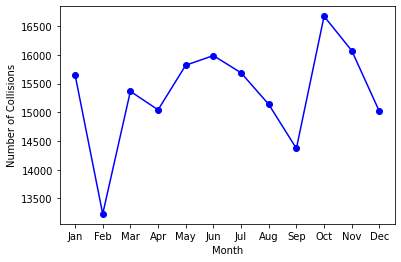

In [ ]:
# Plot collisions by month
xvalsmo = df['MONTH'].value_counts().index
yvalsmo = df['MONTH'].value_counts().values
monthxy = pd.Series(yvalsmo, index=xvalsmo)
monthxy = monthxy.sort_index()
plt.plot(monthxy, '-ob')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(ticks = range(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [ ]:
# MONTH value counts, showing highest number of collisions in October. October is the start of the rainy season in Seattle. February is close to the end of winter.
df.MONTH.value_counts()

10    16672
11    16073
6     15987
5     15819
7     15687
1     15655
3     15365
8     15138
4     15042
12    15014
9     14370
2     13230
Name: MONTH, dtype: int64

In [ ]:
# Look at MONTH value counts by SEVERITYCODE. Again, October is the worst and february is the best.
df.groupby('SEVERITYCODE')['MONTH'].value_counts()

SEVERITYCODE  MONTH
1             10       11478
              11       11316
              6        11194
              1        11142
              5        10903
              3        10829
              12       10810
              7        10729
              4        10566
              8        10404
              9        10023
              2         9453
2             10        5194
              7         4958
              5         4916
              6         4793
              11        4757
              8         4734
              3         4536
              1         4513
              4         4476
              9         4347
              12        4204
              2         3777
Name: MONTH, dtype: int64

October has the largest number of collisions. This could be because rainfall starts to increase in October at the end of the fall season. It is also seen that there is a rise in the number of collisions at the transition between seasons, for example, in March, May and October. This could be due to distracted driving and drivers not paying enough attention to the changing conditions. Conversely, the fewest accidents are in February, which could be because winter is coming to an end, but drivers are still cautious from their exposure to more difficult weather conditions in January.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa784ca080>,
      dtype=object)

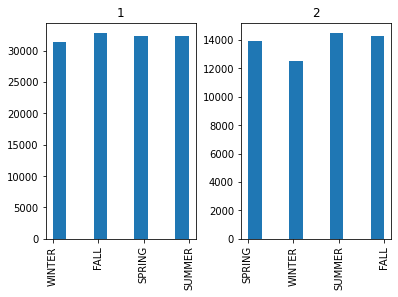

In [ ]:
# Plot collisions by season and severity code
df.hist(column='SEASON', by='SEVERITYCODE')

In [ ]:
# Season value counts. Fall shows more collisions due to the increase in October, and winter shows fewer collisions because of the low number in February
df.SEASON.value_counts()

FALL      47115
SUMMER    46812
SPRING    46226
WINTER    43899
Name: SEASON, dtype: int64

In [ ]:
# Day of the week value counts. Friday shows the most collisions, and Sunday the fewest. This may be as Friday is the end of the work week.
# WEEKEND will not used any more, since the trend is seen from DAYOFWEEK column
df.DAYOFWEEK.value_counts()

4    30544
3    27583
2    27122
1    26852
5    26097
0    24859
6    20995
Name: DAYOFWEEK, dtype: int64

([<matplotlib.axis.XTick at 0x7ffa78830f60>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

<Figure size 864x432 with 0 Axes>

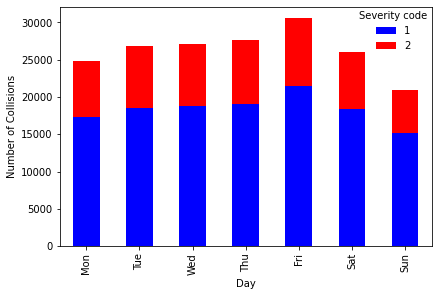

In [ ]:
# Plot collisions for each day of the week
plt.figure(figsize=(12,6))
df.groupby(['DAYOFWEEK', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code", borderaxespad=0, frameon=False)
plt.tight_layout()
plt.xlabel('Day')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(0,7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

A spike is observed on Fridays, which may be due to driver fatigue at the end of the work week.

Text(0, 0.5, 'Number of Collisions')

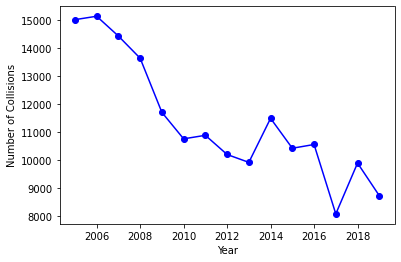

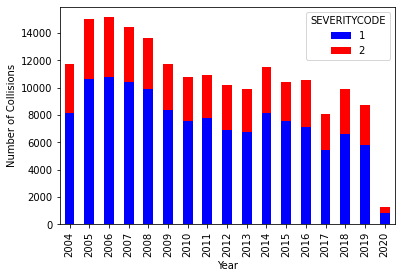

In [ ]:
# Count collisions by year. Drop 2020 as data for 2020 are not complete. Also drop 2004 as it may be incomplete.
dfY = df.YEAR.value_counts().to_frame()
dfY.columns = ['COUNT']
dfY.drop(dfY.index[dfY.index==2020], axis=0, inplace=True)
dfY.drop(dfY[dfY.index==2004].index, axis=0, inplace=True)
dfY.sort_index(inplace=True)

# Plot collisions by year
plt.plot(dfY, '-ob')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

# Plot collisions by severity code. No clear trend of decline in severity code 2 over time is seen. Ignore incomplete 2020 and 2004 data.
df.groupby(['YEAR', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

Now a map of Seattle is created and the collisions are plotted on the map. First all collisions will be plotted. Next a separate map will be created and only severity code 2 collisions leading to injuries will be plotted.

In [ ]:
# Next we will look at X and Y coordinates of collisions
# Check how many coordinates are missing
df.X.isna().sum()

5084

In [ ]:
# Find latitudes and logitudes from X and Y and remove missing values
# In this notebook only 500 points are plotted to reduce the runtime, but the full map was run and is provided in the report

dflocs = df[['Y', 'X', 'SEVERITYCODE']]
dflocs.dropna(subset=['X'], inplace=True)
Latvals = dflocs.Y.to_list()[0:500]
Longvals = dflocs.X.to_list()[0:500]

In [ ]:
# Seattle lattitude and logitude
latitude = 47.60357
longitude = -122.32945
seattlemap = folium.Map(location=[latitude, longitude], zoom_start=12)
seattlemap

In [ ]:
# instantiate a feature group for the incidents in the dataframe
colls = folium.map.FeatureGroup()

# loop through the collisions and add each to the feature group
for lat, lng, in zip(Latvals, Longvals):
    colls.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
    
# add incidents to map
seattlemap.add_child(colls)

Next we will map out collisions of severity 2. Drop all collisions of severity 1 from the dflocs dataframe by setting them to na and then dropping them from the dataframe

In [ ]:
# Find latitudes and logitudes from X and Y for severitycode of 2
# In this notebook only 500 points are plotted to reduce the runtime, but the full map was run and is provided in the report

dflocs2 = df[['Y', 'X', 'SEVERITYCODE']]
dflocs2.dropna(subset=['X'], inplace=True)
dflocs2['SEVERITYCODE'].replace(1, np.nan, inplace=True)
dflocs2.dropna(subset=['SEVERITYCODE'], inplace=True)
Latvals2 = dflocs2.Y.to_list()[0:500]
Longvals2 = dflocs2.X.to_list()[0:500]

In [ ]:
# Check the shape of the final dataframe of locations for severitycode of 2
dflocs2.shape


(54184, 3)

In [ ]:
# Create another map to plot Severity level 2 collisions
seattlemap2 = folium.Map(location=[latitude, longitude], zoom_start=12)

In [ ]:
# instantiate another feature group for the collisions of severity 2 in the dataframe
colls2 = folium.map.FeatureGroup()

# loop through the collisions and add each to the feature group
for lat, lng, in zip(Latvals2, Longvals2):
    colls2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    
# add incidents to map
seattlemap2.add_child(colls2)

Text(0, 0.5, 'Number of Collisions')

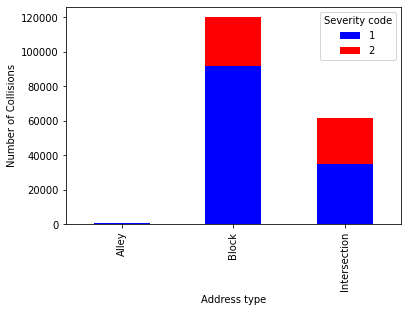

In [ ]:
# Now we will look at the remaining columns and plot them
# Address type

df.groupby(['ADDRTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Address type')
plt.ylabel('Number of Collisions')

Text(0, 0.5, 'Number of Collisions')

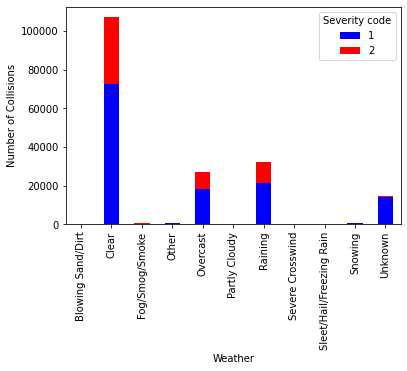

In [ ]:
# Weather
df.groupby(['WEATHER', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Weather')
plt.ylabel('Number of Collisions')

Text(0, 0.5, 'Number of collisions')

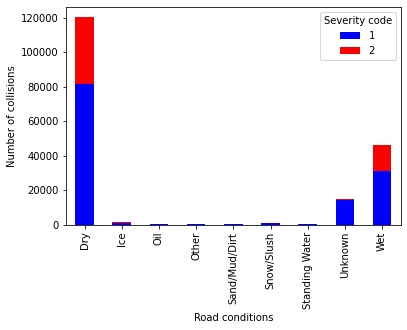

In [ ]:
# Road conditions
df.groupby(['ROADCOND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Road conditions')
plt.ylabel('Number of collisions')

Text(0.5, 0, 'Light conditions')

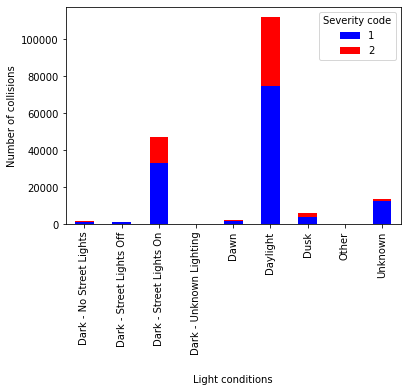

In [ ]:
# Light conditions
df.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('')
plt.ylabel('Number of collisions')
plt.xlabel("Light conditions", labelpad=20)

It is evident that the largest number of collisions occurs on clear days, and far exceeds collisions under rainy conditions. Seattle, which has rainfall for approximately 156 days of the year, has an almost equal number of rainy days and clear days. The large number of collisions occurring on clear days again points to driver fatigue and distracted driving as a major factor. Similarly, most collisions occur when road conditions are dry, and most collisions occur during daylight, or where street lighting is on at night. All of the above observations point to driver fatigue or distraction as a greater factor in collisions than weather, road or light conditions.

Text(0, 0.5, 'Number of collisions')

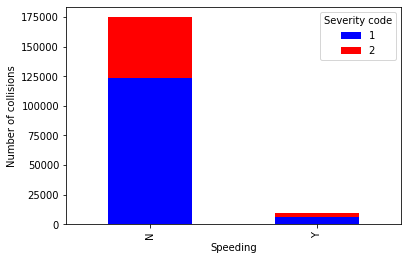

In [ ]:
# Speeding

# Replace empty values with N, in the absence of more information

df['SPEEDING'].replace(r'^\s+$', np.nan, inplace=True)
df['SPEEDING'] = np.where(pd.isnull(df['SPEEDING']), 'N', df['SPEEDING'])
df.groupby(['SPEEDING', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Speeding')
plt.ylabel('Number of collisions')

Text(0.5, 1.0, 'Speeding vehicles')

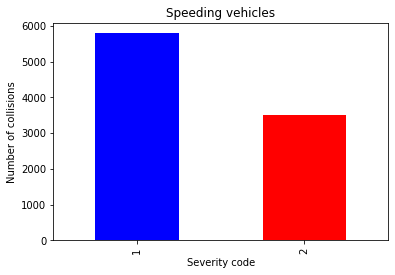

In [ ]:
# Create a new dataframe for speeding cars and plot the severity of accidents for speeding
dfspeed = df[['SPEEDING', 'SEVERITYCODE']][df['SPEEDING']=='Y']
dfspeed['SEVERITYCODE'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Speeding vehicles")

In [ ]:
# Pedestrian right of way not granted
df['PEDROWNOTGRNT'].value_counts()

Y    4627
Name: PEDROWNOTGRNT, dtype: int64

PEDROWNOTGRNT  SEVERITYCODE
N              1               128389
               2                51036
Y              1                  458
               2                 4169
dtype: int64


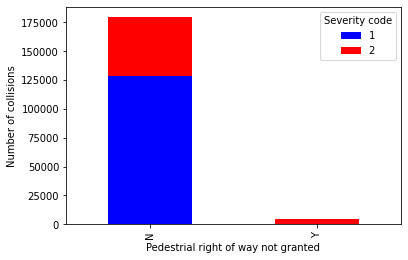

In [ ]:
# Change missing values to No, if not recorded in the absence of more information
# Make a bar plot
df['PEDROWNOTGRNT'] = np.where(pd.isnull(df['PEDROWNOTGRNT']), 'N', df['PEDROWNOTGRNT'])
df.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Pedestrial right of way not granted')
plt.ylabel('Number of collisions')
# print the dataframe groupby result
print(df.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Pedestrian right of way not granted')

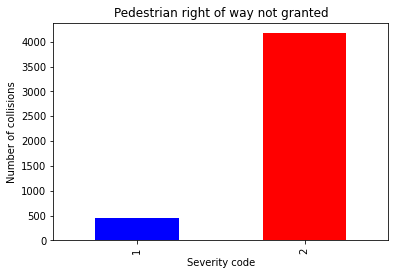

In [ ]:
# Make a new dataframe for when Pedestrian right of way was not granted. 
# The plot shows many more injuries than property damage
dfped = df[['PEDROWNOTGRNT', 'SEVERITYCODE']][df['PEDROWNOTGRNT']=='Y']
dfped['SEVERITYCODE'].value_counts().sort_index().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Pedestrian right of way not granted")

INATTENTIONIND  SEVERITYCODE
0               1               109470
                2                44831
1               1                19377
                2                10374
dtype: int64


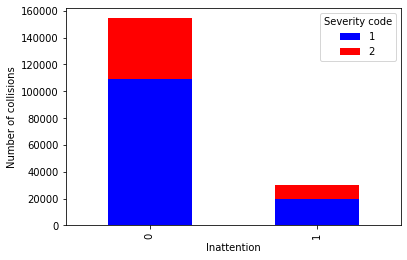

In [ ]:
# Inattention. Change missing values to No, in the absence of more information if not recorded
# Change N to 0, Y to 1

df['INATTENTIONIND'] = np.where(pd.isnull(df['INATTENTIONIND']), 0, df['INATTENTIONIND'])
df['INATTENTIONIND'] = np.where((df['INATTENTIONIND']=='N'), 0 , df['INATTENTIONIND'])
df['INATTENTIONIND'] = np.where((df['INATTENTIONIND']=='Y'), 1 , df['INATTENTIONIND'])
df.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Inattention')
plt.ylabel('Number of collisions')

# print groupby object showing counts
print(df.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Inattention')

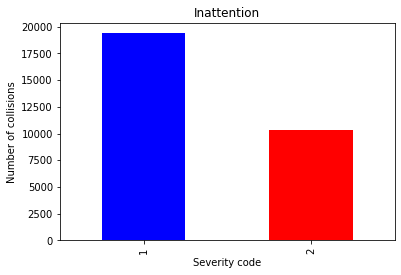

In [ ]:
# Make a new dataframe for when inattention is true. 
# The plot shows injuries are almost half the count of property damage
dfINATT = df[['INATTENTIONIND', 'SEVERITYCODE']][df['INATTENTIONIND']==1]
dfINATT['SEVERITYCODE'].value_counts().sort_index().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Inattention")

UNDERINFL  SEVERITYCODE
0          1               123288
           2                51649
1          1                 5559
           2                 3556
dtype: int64


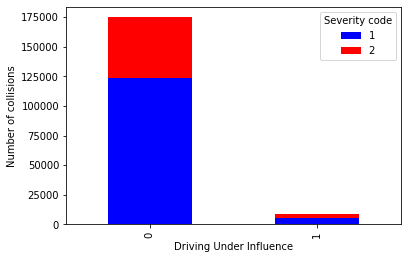

In [ ]:
# Under influence. Change missing values to No, in the absence of more information if not recorded
# Change N to 0, Y to 1

# print counts
df['UNDERINFL'].value_counts()
# Clean data and plot
df['UNDERINFL'] = np.where(pd.isnull(df['UNDERINFL']), 0, df['UNDERINFL'])
df['UNDERINFL'] = np.where((df['UNDERINFL']=='N'), 0, df['UNDERINFL'])
df['UNDERINFL'] = np.where((df['UNDERINFL']=='Y'), 1, df['UNDERINFL'])
df['UNDERINFL'] = df.UNDERINFL.astype(int)
df.groupby(['UNDERINFL', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Driving Under Influence')
plt.ylabel('Number of collisions')
# print grouped counts
print(df.groupby(['UNDERINFL', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Driving under influence')

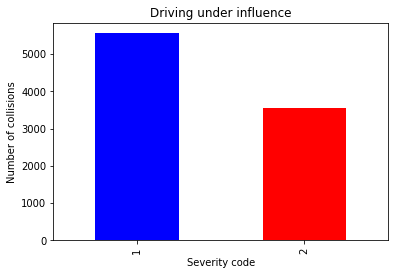

In [ ]:
# Make a new dataframe for when driving under influence is true. 
# The plot shows injuries are more than half the count of property damage
dfdui = df[['UNDERINFL', 'SEVERITYCODE']][df['UNDERINFL']==1]
dfdui['SEVERITYCODE'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Driving under influence")

In [ ]:
# Look at number of cases where driving under influence is true
dfdui.shape

(9115, 2)

It is difficult to measure whether the driver was speeding or if pedestrian right of way was not granted, after an accident, unless there are witnesses or camera footage. Moreover, it is not likely that many drivers would admit to inattention after an accident, or realize that they were inattentive. The data on speeding, pedestrian right of way not being granted and inattention are not very reliable for this reason. The data points on whether the driver was under the influence of alcohol or drugs is more reliable as it is generally measured when a traffic incident is investigated. When these factors are true, it can be seen that there is a much higher proportion of collisions having severity code 2 and leading to injuries. In particular, most accidents when pedestrian right of way is not granted result in injuries.

In [ ]:
# Look at junction types
df['JUNCTIONTYPE'].value_counts().sum()

178038

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1                1375
                                                   2                 581
At Intersection (intersection related)             1               33501
                                                   2               25874
Driveway Junction                                  1                7165
                                                   2                3121
Mid-Block (but intersection related)               1               14921
                                                   2                7089
Mid-Block (not related to intersection)            1               66113
                                                   2               18132
Ramp Junction                                      1                 108
                                                   2                  51
Unknown                                            1        

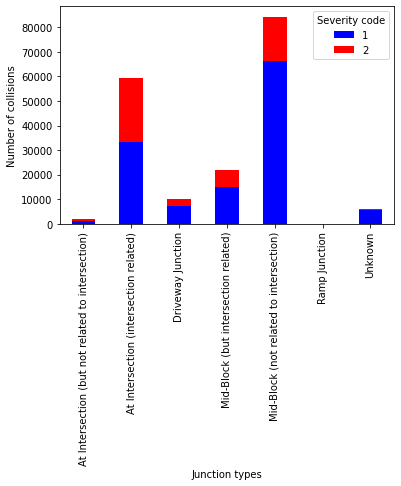

In [ ]:
# Clean up data. Change empty values to unknown
# Junction type will not be used in classification models, 
# because address type captures the important values
df['JUNCTIONTYPE'] = np.where(pd.isnull(df['JUNCTIONTYPE']), 'Unknown', df['JUNCTIONTYPE'])
# plot the data
df.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Junction types')
plt.ylabel('Number of collisions')                                                                                         
# print counts
print(df.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size())

In [ ]:
# state collision description

df['ST_COLDESC'].value_counts().sum()

184032

SEVERITYCODE                                              1        2
ST_COLDESC                                                          
One parked--one moving                              41339.0   2080.0
Entering at angle                                   20289.0  13168.0
From same direction - both going straight - one...  13957.0  11060.0
From same direction - both going straight - bot...  10666.0   1697.0
Fixed object                                         9976.0   3197.0
From opposite direction - one left turn - one s...   5502.0   4488.0
From same direction - both going straight - bot...   4419.0   2944.0
From same direction - all others                     3586.0    807.0
One car leaving parked position                      2335.0    432.0
From same direction - one left turn - one straight   2299.0    708.0
SEVERITYCODE                                              1        2
ST_COLDESC                                                          
Entering at angle                 

Text(0.5, 1.0, 'Top 5 count of severity code 2')

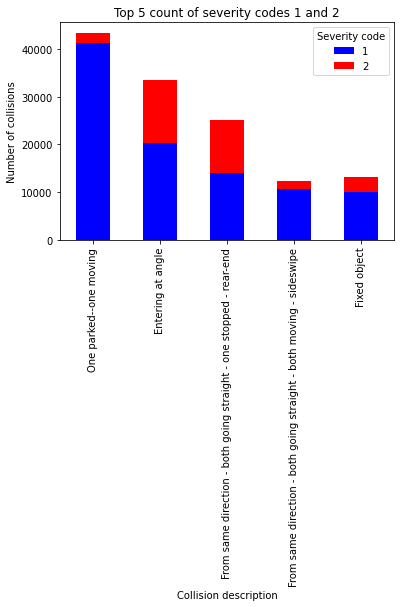

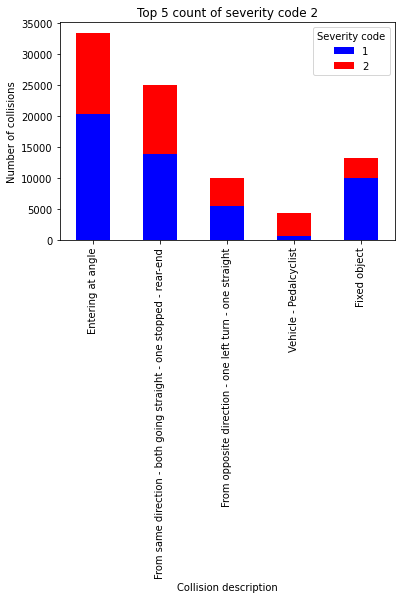

In [ ]:
# Change empty values to Unknown
# There are many values, so only the 10 most frequently occurring, for both severity codes and for severity code 2
df['ST_COLDESC'] = np.where(pd.isnull(df['ST_COLDESC']), 'Unknown', df['ST_COLDESC'])
# print counts
# sorted by total count of both severity codes
print(df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[1], ascending=False)[0:10])
# sorted by count of severity code 2
print(df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[2], ascending=False)[0:10])

# plots
# Top 5 sorted by total count of both severity codes
# One stopped one moving, angles and rear-ending are the top
df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[1], ascending=False)[0:5].plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision description')
plt.ylabel('Number of collisions') 
plt.title('Top 5 count of severity codes 1 and 2')
# Top 5 sorted by count of severity code 2
# Angles and rear-ending are the top
df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[2], ascending=False)[0:5].plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision description')
plt.ylabel('Number of collisions') 
plt.title('Top 5 count of severity code 2')

COLLISIONTYPE  SEVERITYCODE
Angles         1               20289
               2               13168
Cycles         1                 650
               2                4386
Head On        1                1108
               2                 854
Left Turn      1                8027
               2                5242
Other          1               17175
               2                5966
Parked Car     1               44289
               2                2584
Pedestrian     1                 653
               2                5749
Rear Ended     1               18804
               2               14248
Right Turn     1                2273
               2                 588
Sideswipe      1               15579
               2                2420
dtype: int64


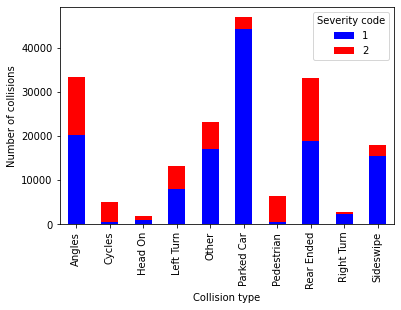

In [ ]:
# Collision type, this will be used in classification models instead of collision description as it has the important information

# Replace empty values with Other
df['COLLISIONTYPE'] = np.where(pd.isnull(df['COLLISIONTYPE']), 'Other', df['COLLISIONTYPE'])
# Plot the data
df.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision type')
plt.ylabel('Number of collisions') 
# Print the counts
print(df.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size())

## Methodology <a name="methodology"></a>

The data cleaning will be completed below. NaN values are dropped. Any “Unknown” or “Other” values are not useful for predictive modeling, and will be dropped. The final data set contained 142,005 rows. The Pearson correlation coefficients are calculated for the features and it is confirmed that they can be treated as independent variables. The dependent variable is the severity code (SEVERITYCODE). 

The data set is split into a training set and a test set, with 20% of the data being used as the test set. The precision, recall, F1 and accuracy scores and log loss are based on the results from the test set. The K Nearest Neighbors (KNN), Logistic Regression, Decision Tree and Support Vector Classification methods are applied.


In [ ]:
# Collect the important columns for classification models into a new data frame
# independent var: 'MONTH', 'DAYOFWEEK', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'PEDROWNOTGRNT', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCYLCOUNT'
# Dependent var: 'SEVERITYCODE'
# Drop empty values
fes = df[['SEVERITYCODE', 'MONTH', 'DAYOFWEEK', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'PEDROWNOTGRNT', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCYLCOUNT']]
fes.dropna(inplace=True, axis=0)
# Shape of dataframe
fes.shape

(181828, 15)

In [ ]:
# Change columns to integer labels instead of text
le=LabelEncoder()
le.fit(['N', 'Y'])
fes['SPEEDING'] = le.transform(fes['SPEEDING'])
fes['PEDROWNOTGRNT'] = le.transform(fes['PEDROWNOTGRNT'])

In [ ]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting
fes['LIGHTCOND'] = fes['LIGHTCOND'].apply(lambda x: 0 if (x in ['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting']) 
                                         else 1 if x=='Daylight'
                                         else 2 if (x in ['Dark - Street Lights On', 'Dawn', 'Dusk'])
                                         else np.nan )
fes.dropna(inplace=True, axis=0)
fes['LIGHTCOND'] = fes['LIGHTCOND'].astype(int)

In [ ]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting
road_dict = {'Dry':0, 'Wet':1, 'Ice':2, r'Snow/Slush':3, 'Standing Water':4, r'Sand/Mud/Dirt':5, 'Oil':6, 'Other':np.nan}
fes['ROADCOND'] = fes['ROADCOND'].map(road_dict)
fes.dropna(inplace=True, axis=0)
fes['ROADCOND'] = fes['ROADCOND'].astype(int)

In [ ]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting

fes['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Snowing', r'Fog/Smog/Smoke', r'Sleet/Hail/Freezing Rain', r'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'],
                       value=[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True) 
fes['WEATHER'] = pd.to_numeric(fes['WEATHER'], errors='coerce')
fes.dropna(inplace=True, axis=0)
fes['WEATHER'] = fes['WEATHER'].astype(int)

In [ ]:
# Change columns to integer labels instead of text

le.fit(['Block', 'Alley', 'Intersection'])
fes['ADDRTYPE'] = le.transform(fes['ADDRTYPE'])

In [ ]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting

fes['COLLISIONTYPE'].replace(to_replace=['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
                       value=[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True) 
fes['COLLISIONTYPE'] = pd.to_numeric(fes['COLLISIONTYPE'], errors='coerce')
fes.dropna(inplace=True, axis=0)
fes['COLLISIONTYPE'] = fes['COLLISIONTYPE'].astype(int)

In [ ]:
# Change columns to integer labels instead of text
# Drop empty values
fes['INATTENTIONIND'] = fes['INATTENTIONIND'].astype(int)
fes.dropna(inplace=True, axis=0)
# print final shape and data types. All data types are now integer
print(fes.shape)
fes.dtypes

(142005, 15)


SEVERITYCODE      int64
MONTH             int64
DAYOFWEEK         int64
INATTENTIONIND    int64
UNDERINFL         int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
SPEEDING          int64
PEDROWNOTGRNT     int64
ADDRTYPE          int64
COLLISIONTYPE     int64
PERSONCOUNT       int64
VEHCOUNT          int64
PEDCYLCOUNT       int64
dtype: object

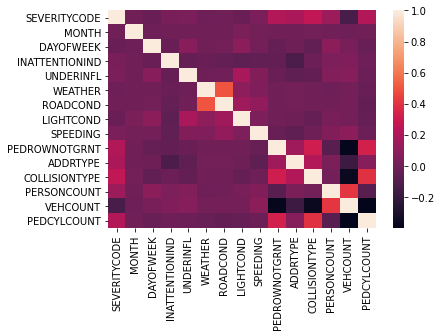

In [ ]:
# Plot correlation coefficients of the features and dependent variable

sns.heatmap(fes.corr())

# The heat map suggests the most important features in predicting the severity code are whether or not the pedestrian right of way was granted, 
# address type, collision type, person count and pedestrian/ cyclist count.

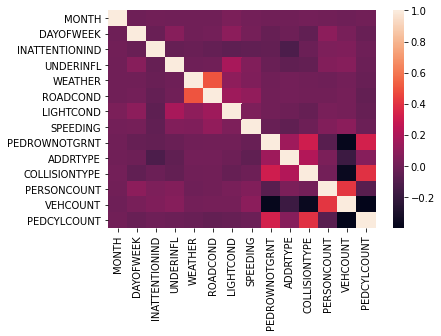

In [ ]:
# Plot correlation coefficients of the features 

colnames = [i for i in fes.columns if i not in ['SEVERITYCODE']]
sns.heatmap(fes[colnames].corr())

# No strong correlations between features are observed, although there are some correlations, for example, between road conditions and light conditions

In [ ]:
# Define X and y data

y = fes['SEVERITYCODE']
X = fes[colnames].values

In [ ]:
# Split the data into train and test sets, using a test size of 20% of data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Results <a name="results"></a>

The K Nearest Neighbors (KNN), Logistic Regression, Decision Tree and Support Vector Classification methods are applied below. The number of neighbors for the KNN method is varied between 1 and 9, and the value providing maximum accuracy is selected. Similarly, the maximum depth of the decision tree and the regularization parameter in logistic regression are varied, to maximize the recall score for severity code 2. In the support vector method, the rbf kernel was found to perform better than the sigmoid or linear kernels.

The models are able to predict severity code 1 collisions well, but do not perform well for predicting severity code 2 collisions. The KNN model has a higher recall for class 2, compared to the Decision Tree Classifier, Logistic Regression model and SVC model with rbf kernel. 

Severity code 2 collisions leading to injuries are not predicted well in this approach. This is partly because severity code 2 collisions are only 30% of the data set. It is also possible that the feature set does not fully capture all the relevant information. Injuries can be prevented in car accidents by wearing a seat belt, or if car manufacturers improve safety devices like airbags. Newer and high-end cars may also provide features such as blind spot warnings and automatic braking. Since car manufacturers are expected to provide improved safety features over time, the number of collisions is expected to decline over the years. On the whole, there is a decrease in the number of collisions over the years. There is a spike in 2014-2016, which could have been due to improved recording of accidents, changes in employment, or other factors, but this could not be explained. The year was not included in the predictive modeling, as it is not a predictive feature in itself. For severity code 2 collisions, no clear decrease was observed over the years. Wearing a seat belt may be an important feature in preventing severity code 2 collisions resulting in injuries. More data are needed on whether seat belts were in use, and the safety features available in the involved cars.

In [ ]:
# Run KNN classification. Vary k to find the value giving the best recall score for severity code 2

nk = 9
meanac = np.zeros(nk)
recsc = np.zeros(nk)
stdac = np.zeros(nk)

for i in range(nk):
    kne = KNeighborsClassifier(n_neighbors=i+1).fit(Xtrain, ytrain)
    yhat = kne.predict(Xtest)
    meanac[i] = accuracy_score(ytest, yhat)
    recsc[i] = recall_score(ytest, yhat, pos_label=2)
    stdac[i] = np.std(ytest==yhat)/np.sqrt(yhat.shape[0])

    
kopt = np.argmax(meanac)
print('Value of k with max accuracy score: ', kopt+1)
print('Max accuracy score and corresponding standard deviation: ', np.max(meanac), stdac[kopt])
print('Corresponding recall score for class 2: ', recsc[kopt])

# Run KNN with optimum value of k and print classification report
kne = KNeighborsClassifier(n_neighbors=kopt+1).fit(Xtrain, ytrain)
yhat = kne.predict(Xtest)
print(classification_report(ytest, yhat))

Value of k with max accuracy score:  8
Max accuracy score and corresponding standard deviation:  0.7191296081123905 0.002666795718298943
Corresponding recall score for class 2:  0.36914428482198625
              precision    recall  f1-score   support

           1       0.74      0.90      0.81     18795
           2       0.65      0.37      0.47      9606

    accuracy                           0.72     28401
   macro avg       0.69      0.63      0.64     28401
weighted avg       0.71      0.72      0.69     28401



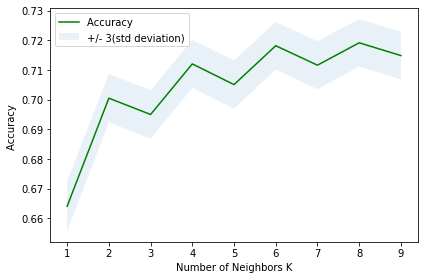

In [ ]:
# Plot accuracy from KNN vs number of neighbors
plt.plot(range(1,nk+1),meanac,'g')
plt.fill_between(range(1,nk+1),meanac - 3*stdac,meanac + 3*stdac, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3(std deviation)'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors K')
plt.tight_layout()
plt.show()

In [ ]:
# Decision tree model. 

depths = np.arange(3,8)
rescl = np.zeros(len(depths))

for i, md in enumerate(depths):
    dtmodel = DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=42)
    dtmodel.fit(Xtrain, ytrain)
    ypred = dtmodel.predict(Xtest)
    rescl[i] = recall_score(ytest, ypred, pos_label=2) # recall score for class 2

dfin = depths[np.argmax(rescl)]
dtmodel = DecisionTreeClassifier(criterion='entropy', max_depth=dfin, random_state=42)
dtmodel.fit(Xtrain, ytrain)
ypred = dtmodel.predict(Xtest)

print('Decision tree depth for max recall of severity code 2:', dfin)
print(classification_report(ytest, ypred))


Decision tree depth for max recall of severity code 2: 6
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     18795
           2       0.74      0.31      0.44      9606

    accuracy                           0.73     28401
   macro avg       0.73      0.63      0.63     28401
weighted avg       0.73      0.73      0.69     28401



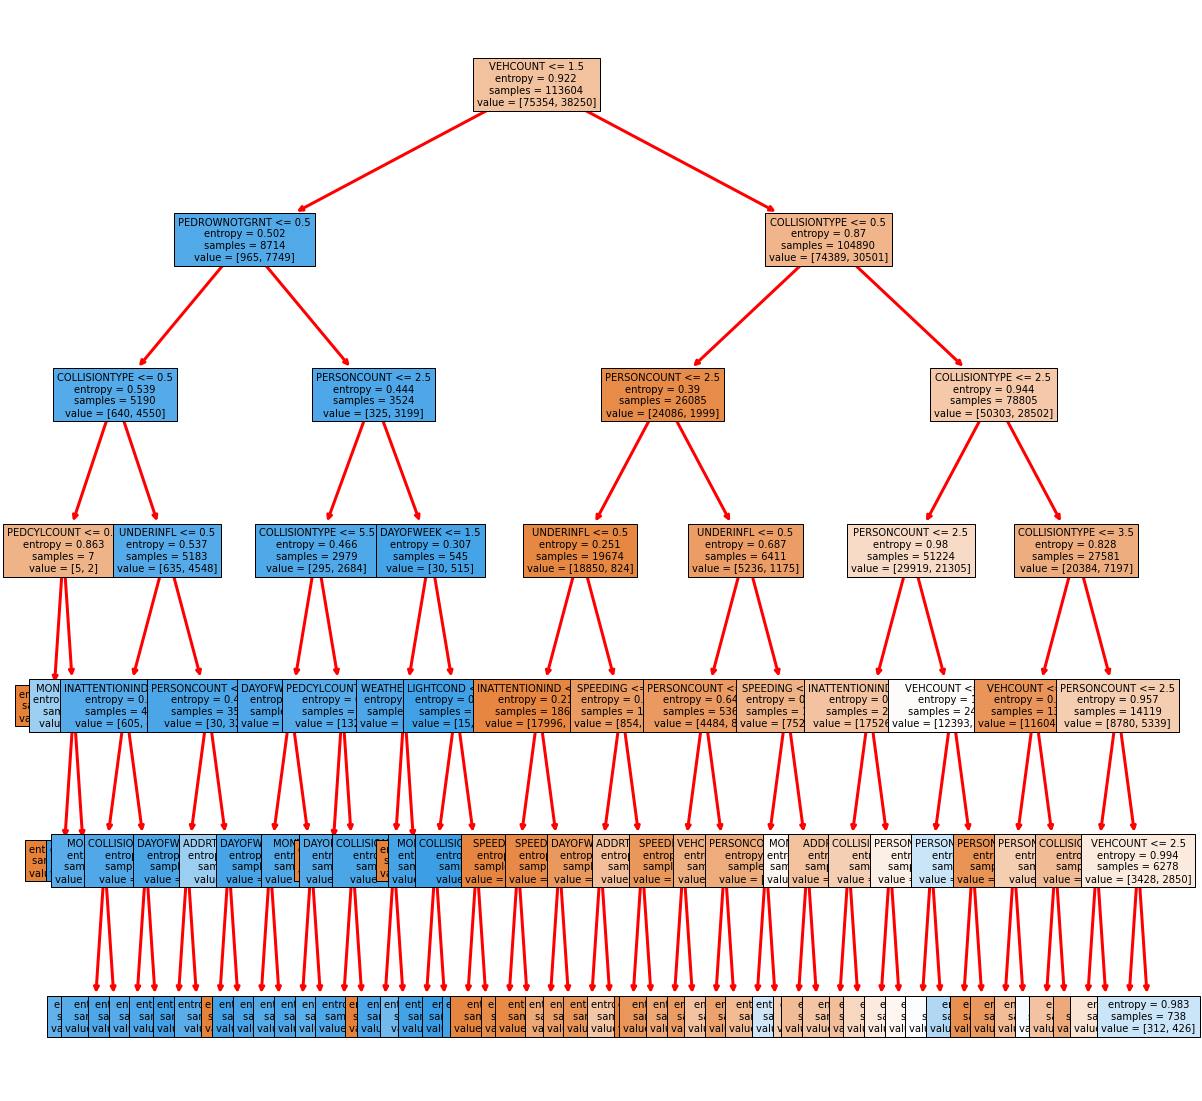

In [ ]:
# Plot the tree

fig, ax = plt.subplots(figsize=(20,20))
out = tree.plot_tree(dtmodel, feature_names=colnames, filled=True, fontsize=10, ax=ax)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(3)
        arrow.set_edgecolor('red')
plt.show()     

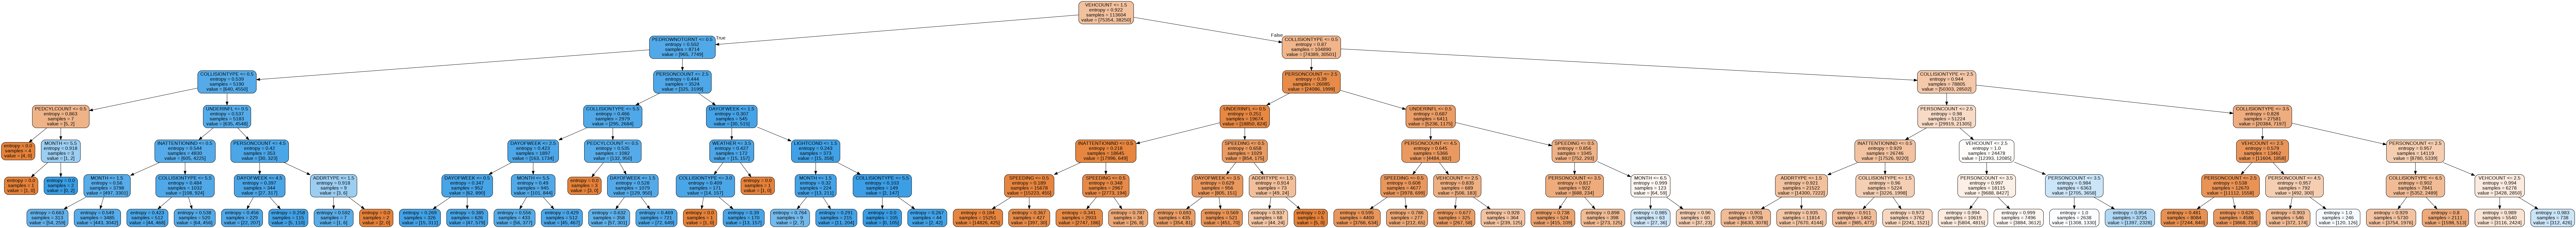

In [ ]:
# Plot the tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import graphviz

dot_data = StringIO()
export_graphviz(dtmodel, out_file=dot_data, filled=True, rounded=True , feature_names=colnames)
graph = graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
# Feature importances from decision tree
fimp = pd.DataFrame()
fimp['Feature importances'] = dtmodel.feature_importances_
fimp['Features'] = colnames
fimp = fimp.set_index('Features')
fimp.sort_values(by='Feature importances', ascending=False, inplace=True)
fimp.head(6)

,Feature importances
Features,
COLLISIONTYPE,0.443647
VEHCOUNT,0.437455
PERSONCOUNT,0.095845
UNDERINFL,0.011486
INATTENTIONIND,0.004246
SPEEDING,0.002695


In [ ]:
# Logistic regression
# C (regularization) was varied and selected based on the highest recall score

Cvals = [0.001, 0.01, 0.1, 1, 10]
jacc = np.zeros(len(Cvals))
lllr = np.zeros(len(Cvals))
rescl = np.zeros(len(Cvals))

for ci, cval in enumerate(Cvals):
    LR = LogisticRegression(C=cval, solver='newton-cg').fit(Xtrain, ytrain)
    yhat = LR.predict(Xtest)
    ypro = LR.predict_proba(Xtest)
    rescl[ci] = recall_score(ytest, yhat, pos_label=2)
    jacc[ci] = accuracy_score(ytest, yhat)
    lllr[ci] = log_loss(ytest, ypro)
    
ciopt = np.argmax(rescl)
cvalopt = Cvals[ciopt]

print('Max recall score: ', np.max(rescl))
print('Corresponding accuracy score: ', jacc[ciopt])
print('Corresponding log loss: ', lllr[ciopt])
print('Optimum C: ', cvalopt)

LR = LogisticRegression(C=cvalopt, solver='newton-cg').fit(Xtrain, ytrain)
yhat = LR.predict(Xtest)
print(classification_report(ytest, yhat))

Max recall score:  0.2963772642098688
Corresponding accuracy score:  0.7038132460124643
Corresponding log loss:  0.5682235254026102
Optimum C:  0.001
              precision    recall  f1-score   support

           1       0.72      0.91      0.80     18795
           2       0.63      0.30      0.40      9606

    accuracy                           0.70     28401
   macro avg       0.67      0.60      0.60     28401
weighted avg       0.69      0.70      0.67     28401



In [ ]:
# Support Vector Classification
# sigmoid kernel
# linear kernel: low recall of 0.22 for class 2

clfs = SVC(kernel='sigmoid', gamma='auto', probability=True)
clfs.fit(Xtrain, ytrain)
yhat = clfs.predict(Xtest)
jac = accuracy_score(ytest, yhat)
print(classification_report(ytest, yhat))

print('Accuracy score: ', jac)

              precision    recall  f1-score   support

           1       0.64      0.64      0.64     18795
           2       0.29      0.29      0.29      9606

    accuracy                           0.52     28401
   macro avg       0.46      0.46      0.46     28401
weighted avg       0.52      0.52      0.52     28401

Accuracy score:  0.5217069821485159


In [ ]:
# Support Vector Classification
# rbf kernel

clfr = SVC(kernel='rbf', gamma='auto', probability=True)
clfr.fit(Xtrain, ytrain)
yhat = clfr.predict(Xtest)
jac = accuracy_score(ytest, yhat)
print(classification_report(ytest, yhat))

print('Accuracy score: ', jac)

              precision    recall  f1-score   support

           1       0.72      0.96      0.83     18795
           2       0.79      0.28      0.42      9606

    accuracy                           0.73     28401
   macro avg       0.76      0.62      0.62     28401
weighted avg       0.75      0.73      0.69     28401

Accuracy score:  0.7315939579592268


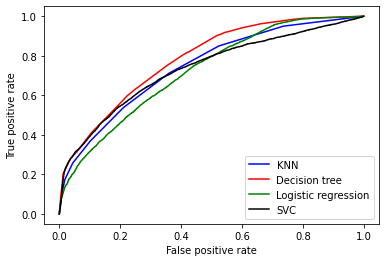

In [ ]:
from sklearn import metrics

# KNN based on 8 neighbors
# Decision Tree based on max depth of 6
# SVC based on rbf kernel
# Logistic Regression based on C to maximize recall of class 2

classifiers = [kne, dtmodel, LR, clfr]
colors = ['b', 'r', 'g', 'k']
ax = plt.gca()
for i, c in zip(classifiers, colors):
    metrics.plot_roc_curve(i, Xtest, ytest, c=c, ax=ax)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['KNN', 'Decision tree', 'Logistic regression', 'SVC'])

|Algorithm           | Accuracy| F1-score, class 1 |F1-score, class 2 | Recall, class 2 | 
| ------------------- | ------- | -------- | ------- |------- |
| KNN                 | 0.72    | 0.81     |0.47     | 0.37   |        
| Decision Tree       | 0.73    | 0.82     |0.44     |  0.31  |        
| SVM                 | 0.73    | 0.83     | 0.42    | 0.28   |        
| Logistic Regression | 0.70    | 0.80     | 0.40    |0.30    | 

## Discussion <a name="discussion"></a>
In this report, car accidents in Seattle over the last 15 years were analyzed, and predictive models were built to predict the severity of car accidents. The data revealed that factors like driver fatigue and distracted driving play a bigger role than external factors like road conditions, weather or light conditions. 

A supervised learning approach based on KNN, Logistic Regression, Decision Tree and Support Vector Classification methods was adopted. Accidents leading to property damage could be predicted well. However, the models showed a low recall for accidents leading to injuries. This is partly due to fewer cases of accidents leading to injuries relative to property damage in the data set. The threshold for injury probability could potentially be lowered to better predict injuries. It is also possible that factors like driver inattention, speeding, and pedestrian right of way not being granted, were not reliably recorded, making it difficult to predict injuries. Potentially, more data may be needed to build improved models; for example, whether seat belts were in use, and the ranking of safety features available in the involved cars.


## Conclusions <a name="conclusions"></a>

In this report, traffic collisions in Seattle are analyzed, and predictive models are built based on supervised learning methods. One potential future direction is to build more advanced models based on deep neural networks to predict accident severity. Setting a lower threshold for the probability of injuries may improve the recall for injury prediction. However, this may reduce the precision of the model. Another direction is to improve data collection. If factors like driver inattention, speeding, and pedestrian right of way not being granted are more reliably recorded, predictions may be improved. In addition, collecting data on whether seat belts were in use, and the ranking of safety features available in the involved cars, may also assist in improving the injury prediction rate.

